In [3]:
import csv

import matplotlib.pyplot as plt 
%matplotlib inline

from fastai.vision.all import *

In [4]:
MODEL_PATH = 'models/model.pkl'
OUTPUT_FILE = 'predictions.csv'
PATH_TEST_IMAGES = 'data/input/test/'

def GetLabel(fileName):
    return fileName.split('-')[0]

In [5]:
learn = load_learner(MODEL_PATH)
img_list = os.listdir(PATH_TEST_IMAGES)

In [6]:
preds = []

# predict over all test imgs
with learn.no_bar(), learn.no_logging(): #Avoid learner print on console
    for img_path in img_list:
        img = PILImage.create(os.path.join(PATH_TEST_IMAGES,img_path))
        label,tensor_base,probs = learn.predict(img)
        preds.append((img_path, label,int(tensor_base)))

# save predictions
with open(OUTPUT_FILE,'w', newline='') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['file_id','label', 'label_id'])
    for row in preds:
        csv_out.writerow(row)

He/She is playing football.
Probabilities:
Baseball 0.01%
Cricket 0.00%
Football 99.99%


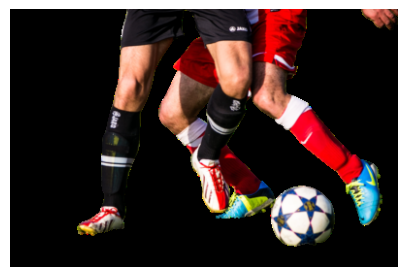

He/She is playing football.
Probabilities:
Baseball 0.01%
Cricket 0.00%
Football 99.99%


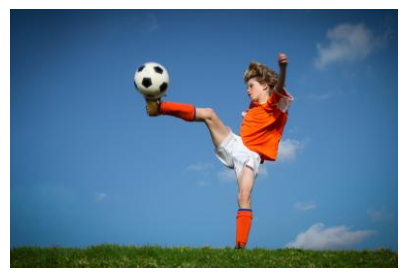

He/She is playing football.
Probabilities:
Baseball 2.00%
Cricket 0.01%
Football 97.99%


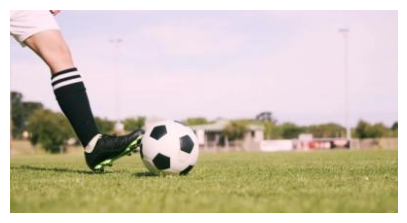

He/She is playing baseball.
Probabilities:
Baseball 66.21%
Cricket 0.34%
Football 33.45%


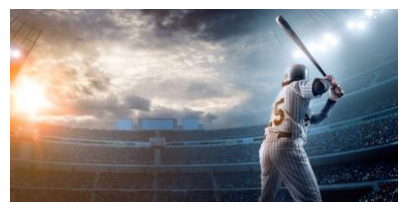

He/She is playing baseball.
Probabilities:
Baseball 56.49%
Cricket 41.97%
Football 1.54%


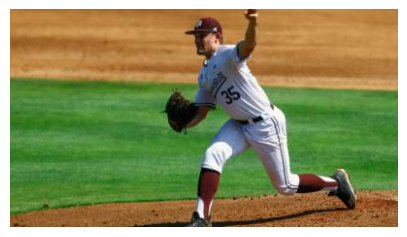

He/She is playing football.
Probabilities:
Baseball 0.01%
Cricket 0.00%
Football 99.99%


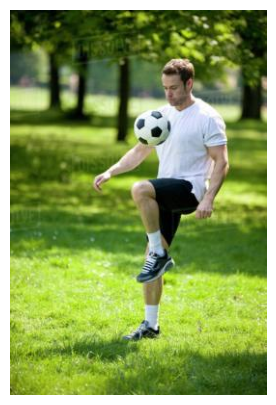

He/She is playing cricket.
Probabilities:
Baseball 1.19%
Cricket 98.74%
Football 0.07%


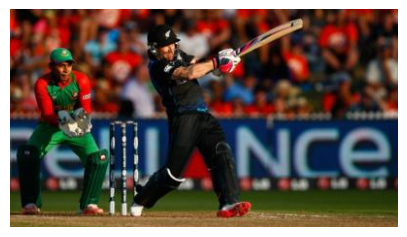

He/She is playing football.
Probabilities:
Baseball 4.07%
Cricket 4.90%
Football 91.03%


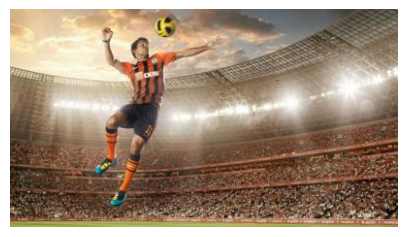

He/She is playing cricket.
Probabilities:
Baseball 0.14%
Cricket 99.78%
Football 0.09%


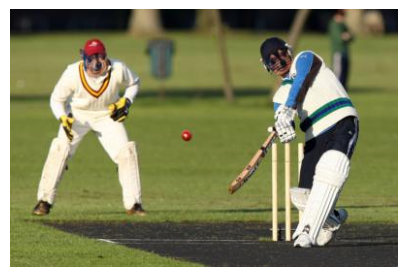

He/She is playing football.
Probabilities:
Baseball 5.67%
Cricket 4.44%
Football 89.89%


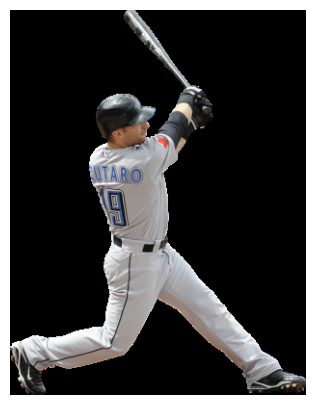

In [9]:
imgs_paths = random.sample(img_list,10)

with learn.no_bar(), learn.no_logging(): #Avoid learner print on console
    for img_path in imgs_paths:
        img = PILImage.create(os.path.join(PATH_TEST_IMAGES,img_path))
        
        label,_,probs = learn.predict(img)
        print(f"===============================================================================")
        print(f"He/She is playing {label}.")
        print(f"Probabilities:")
        print(f"Baseball {probs[0].item():.2%}")
        print(f"Cricket {probs[1].item():.2%}")
        print(f"Football {probs[2].item():.2%}")
        img.show()
        plt.show()
    
